<div style="border:solid green 2px; padding: 20px">

<b>Привет, Вера!</b>

Меня зовут Ярослав П. и я буду проверять твой проект. Попробую помочь сделать тебе его еще лучше!

Предлагаю общаться на «**ты**». Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на «**вы**».

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания или советы.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    
    
### <span style="color:orange">Обратная связь</span><a class="tocSkip">

- Проект отлично выполнен.
- Финальная метрика получена отличная.
- В проекте классно реализовано тестирование моделей и запись результатов.
- Однако есть неточность при использовании кросс-валидации (внутри гридсерча). Оставил комментарий.
    
### <span style="color:orange">Обратная связь (v2)</span><a class="tocSkip">

- Проект отлично доработан, спасибо за уделенное время!
    
Проект принят, успехов в дальнейшем обучении!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно ***спрогнозировать количество заказов такси на следующий час.*** Постройте модель для такого предсказания.

Значение метрики ***RMSE*** на тестовой выборке должно быть ***не больше 48.***

Задачи:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Хорошее введение.

</div>


## Подготовка

In [1]:
# Загрузка библиотек
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Путь к файлам
taxi=pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
taxi.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [3]:
# Проверка типов данных
taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
# Проверка столбца на уникальность данных
taxi['num_orders'].unique()

array([  9,  14,  28,  20,  32,  21,   7,   5,  17,  12,  19,  25,  22,
         8,   6,   4,  10,  13,   2,   3,   0,   1,  11,  15,  16,  23,
        18,  33,  24,  26,  30,  38,  34,  42,  31,  27,  36,  29,  35,
        56,  37,  40,  39,  45,  49,  58,  68,  43,  53,  44,  41,  52,
        46,  57,  47,  64,  61,  50,  48,  55,  62,  54,  71,  78, 119,
        99,  51,  60,  87,  90,  94,  82,  80,  91,  76,  66,  65,  98,
        81,  95,  67])

### Вывод:
Предоставленный для анализа временной ряд загружен, проверен по типам данных и на уникальность значений (есть 0- возможно аномалия загрузки информации). 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Здорово, что обнаружила это значение. Было бы здорово изучить такие записи подробнее, посмотреть на значения, которые рядом с ними. Вдруг это не аномалия.

</div>


## Анализ

Выполним проверку объекта на монотонность, ресемплинг, декомпозицию и построим графики трендов и сезонности.

In [5]:
# Проверка индекса на монотонность
print(taxi.index.is_monotonic)

True


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Логичная проверка.

</div>


In [6]:
# Ресемплинг- сумма по каждому часу
taxi.sort_index(inplace=True)
data = taxi.resample('1H').sum()
data.head(7)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Ресеплинг проводится корректно.

</div>


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
num_orders    4416 non-null int64
dtypes: int64(1)
memory usage: 69.0 KB


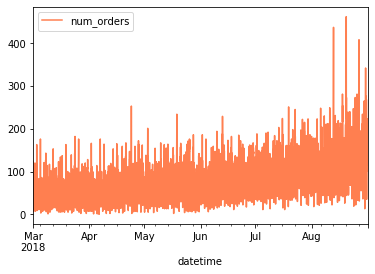

In [8]:
# График по ресемплированной выборке
data.plot(color = 'coral')
plt.show()

In [9]:
# Период временного ряда (6 месяцев)
data.index.min(), data.index.max()

(Timestamp('2018-03-01 00:00:00'), Timestamp('2018-08-31 23:00:00'))

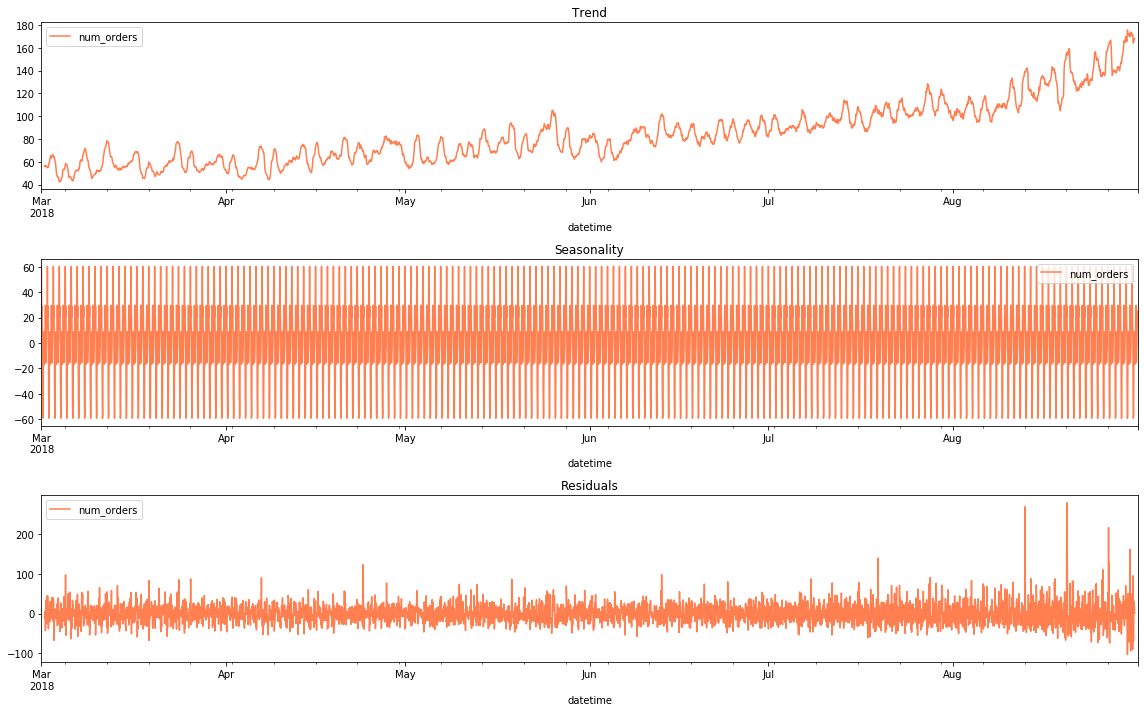

In [10]:
# Разложение временного ряда на тренд, сезонную составляющую, остаток декомпозиции
data.sort_index(inplace=True)
data = data['2018-03-01':'2018-08-31'].resample('1H').sum()

decomposed = seasonal_decompose(data) 

plt.figure(figsize=(16, 10))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca(), color = 'coral')
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca(), color = 'coral') 
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca(), color = 'coral') 
plt.title('Residuals')
plt.tight_layout()

Далее представлена декомпозиция данных в рамках недели, суток (24 часа).

Text(0.5, 1.0, 'Seasonality, week')

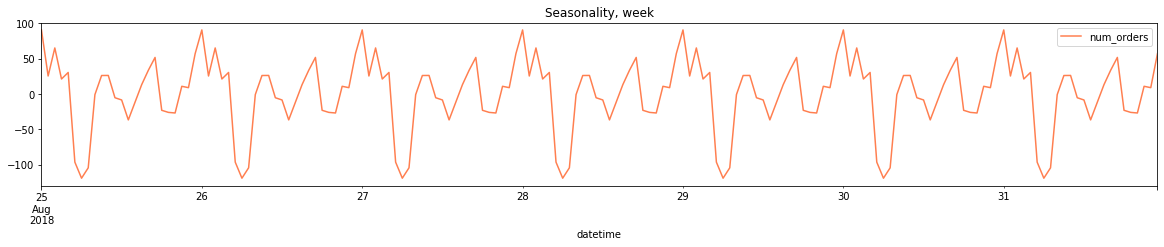

In [11]:
decomposed_data_taxi = seasonal_decompose(data['2018-08-25':'2018-08-31'])
decomposed_data_taxi.seasonal.plot(figsize=(20, 3), color = 'coral')
plt.title('Seasonality, week')

Text(0.5, 1.0, 'Seasonality, day')

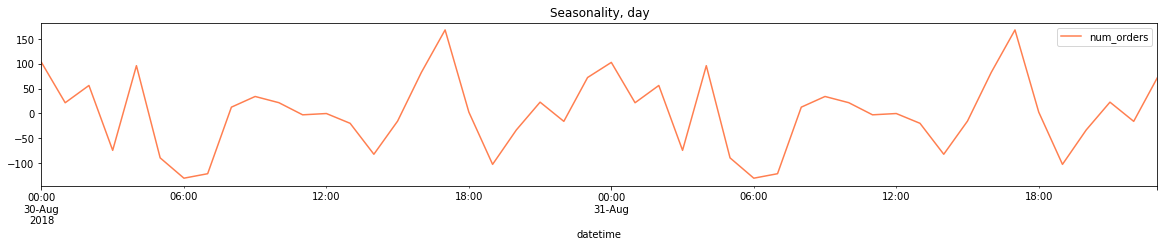

In [12]:
decomposed_data_taxi = seasonal_decompose(data['2018-08-30':'2018-08-31'])
decomposed_data_taxi.seasonal.plot(figsize=(20, 3), color = 'coral')
plt.title('Seasonality, day')

### Вывод:
Восходящий тренд динамики заказов такси Март-Август 2018г. ярко демонстрирует увеличение дисперсии и наличие сезонности, остаток декомпозиции в Августе имеет больший разброс в данных ("шум"). 
<br>В дополнение, если смотреть на выборки:
<br>за неделю- потребность меняется волнообразно по времени суток, без акцента на определенном дне недели;  
<br>за день- пиковая потребность в такси вечером и ночью (с работы, в аэропорт и тп), а утром- спад.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Все здорово. Восходящий тренд и суточная сезонность определены корректно.

</div>


## Обучение

Для обучения выбраны следующие модели регрессии: GradientBoostingRegressor', 'RandomForestRegressor', 'LGBMRegressor', 'Ridge', 'Lasso'. 
<br>Стандартно train_test_split и далее. 
<br>Не выбраны пока RNN, как и Facebook Prophet или другие специальные модели из statsmodels.

In [13]:
# Функция для определения аргументов
def make_features(data, max_lag, rolling_mean_size):

    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Было бы здорово сделать так, чтобы функция возвращала новый датафрейм, не меняя глобальную переменную. Также обрати внимание, нужны ли нам признаки года и месяца? Год у нас один, это будет константа. А месяцев у нас достаточно мало, из-за чего этот признак тоже, скорей всего, не будет оказывать влияния на предсказание.

</div>


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

👍

</div>


In [14]:
make_features(data, 24, 10)

In [15]:
# Отделение 10% данных для тестовой выборки, на обучающую- 90%
train, test = train_test_split(data, shuffle=False, test_size=0.1, random_state=12345)
train = train.dropna()

features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']
features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(3950, 27) (442, 27) (3950,) (442,)


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Разделение корректное.

</div>


In [16]:
%%time
# Подбор параметров GridSearchCV в TimeSeriesSplit

#GradientBoostingRegressor
regressor = GradientBoostingRegressor() 
hyperparams = [{'n_estimators': range (1, 8, 2), 
                'max_depth': range (1,4),
                'random_state':[12345]}]

tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=regressor, cv=tscv, param_grid=hyperparams, scoring='neg_mean_squared_error')
gsearch.fit(features_train, target_train)
print(gsearch.best_params_)
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch.cv_results_['params']):
    print("%0.2f for %r"% ((mean*-1)** 0.5, params))

RMSE_rf = (max(mean*-1)) ** 0.5

{'max_depth': 3, 'n_estimators': 7, 'random_state': 12345}
44.35 for {'max_depth': 1, 'n_estimators': 1, 'random_state': 12345}
42.83 for {'max_depth': 1, 'n_estimators': 3, 'random_state': 12345}
41.59 for {'max_depth': 1, 'n_estimators': 5, 'random_state': 12345}
40.60 for {'max_depth': 1, 'n_estimators': 7, 'random_state': 12345}
43.91 for {'max_depth': 2, 'n_estimators': 1, 'random_state': 12345}
41.86 for {'max_depth': 2, 'n_estimators': 3, 'random_state': 12345}
39.83 for {'max_depth': 2, 'n_estimators': 5, 'random_state': 12345}
37.84 for {'max_depth': 2, 'n_estimators': 7, 'random_state': 12345}
43.26 for {'max_depth': 3, 'n_estimators': 1, 'random_state': 12345}
40.82 for {'max_depth': 3, 'n_estimators': 3, 'random_state': 12345}
39.03 for {'max_depth': 3, 'n_estimators': 5, 'random_state': 12345}
37.31 for {'max_depth': 3, 'n_estimators': 7, 'random_state': 12345}


TypeError: 'numpy.float64' object is not iterable

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера (v2)</b>

Тут выбивает странную ошибку.

</div>


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>В случае работы использовать кросс-валидацию, встроенную в GridSearchCV  некорректно. Если мы исследуем временной ряд, то в каждом сплите тестовые индексы должны быть позже по времени, чем обучающие, поэтому перетасовка обычным способом неуместна. [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) решает эту проблему.

Код реализации:
    
<code>
tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
gsearch.fit(X, y)</code></font>


</div>


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Теперь все верно!

</div>


In [17]:
#Обучение модели
model_gb = GradientBoostingRegressor(n_estimators=7, 
                      max_depth=3, 
                      random_state=12345)
model_gb.fit(features_train, target_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=7,
                          n_iter_no_change=None, presort='auto',
                          random_state=12345, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
#Предсказание на тестовой выборке
target_predict = model_gb.predict(features_test)

In [19]:
%%time

#RMSE на тестовой выборке
test_RMSE_gb = mean_squared_error(target_test, target_predict) ** 0.5
print('test_RMSE of GradientBoostingRegressor = {0:.2f}'.format(test_RMSE_gb))

test_RMSE of GradientBoostingRegressor = 66.64
CPU times: user 1.15 ms, sys: 87 µs, total: 1.24 ms
Wall time: 1.16 ms


GradientBoostingRegressor_RMSE: 66.64 при best_params_{'max_depth': 3, 'n_estimators': 7, 'random_state': 12345}

In [20]:
%%time

#RandomForestRegressor()
regressor = RandomForestRegressor() 
hyperparams = [{'n_estimators': range (1, 8, 2), 
                'max_depth': range (1,4),
                'random_state':[12345]}]

tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=regressor, cv=tscv, param_grid=hyperparams, scoring='neg_mean_squared_error')
gsearch.fit(features_train, target_train)
print(gsearch.best_params_)
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch.cv_results_['params']):
    print("%0.2f for %r"% ((mean*-1)** 0.5, params))

RMSE_rf = (max(means)*-1) ** 0.5

{'max_depth': 3, 'n_estimators': 7, 'random_state': 12345}
39.24 for {'max_depth': 1, 'n_estimators': 1, 'random_state': 12345}
39.14 for {'max_depth': 1, 'n_estimators': 3, 'random_state': 12345}
39.54 for {'max_depth': 1, 'n_estimators': 5, 'random_state': 12345}
39.42 for {'max_depth': 1, 'n_estimators': 7, 'random_state': 12345}
35.85 for {'max_depth': 2, 'n_estimators': 1, 'random_state': 12345}
34.75 for {'max_depth': 2, 'n_estimators': 3, 'random_state': 12345}
35.43 for {'max_depth': 2, 'n_estimators': 5, 'random_state': 12345}
35.18 for {'max_depth': 2, 'n_estimators': 7, 'random_state': 12345}
34.01 for {'max_depth': 3, 'n_estimators': 1, 'random_state': 12345}
31.88 for {'max_depth': 3, 'n_estimators': 3, 'random_state': 12345}
32.10 for {'max_depth': 3, 'n_estimators': 5, 'random_state': 12345}
31.86 for {'max_depth': 3, 'n_estimators': 7, 'random_state': 12345}
CPU times: user 830 ms, sys: 3.24 ms, total: 833 ms
Wall time: 830 ms


In [21]:
model_rf = RandomForestRegressor(n_estimators=7, 
                      max_depth=3, 
                      random_state=12345)
model_rf.fit(features_train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
                      oob_score=False, random_state=12345, verbose=0,
                      warm_start=False)

In [22]:
target_predict = model_rf.predict(features_test)

In [23]:
%%time
test_RMSE_rf = mean_squared_error(target_test, target_predict) ** 0.5
print('test_RMSE of RandomForestRegressor = {0:.2f}'.format(test_RMSE_rf))

test_RMSE of RandomForestRegressor = 56.94
CPU times: user 2.24 ms, sys: 149 µs, total: 2.39 ms
Wall time: 3.3 ms


RandomForestRegressor_RMSE: 56.94 при best_params_{'max_depth': 3, 'n_estimators': 7, 'random_state': 12345}

In [24]:
%%time

#LGBMRegressor()
regressor = LGBMRegressor() 
hyperparams = [{'num_leaves':[11, 50, 100], 
                'max_depth': range (1,4),
                'random_state':[12345]}]

tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=regressor, cv=tscv, param_grid=hyperparams, scoring='neg_mean_squared_error')
gsearch.fit(features_train, target_train)
print(gsearch.best_params_)
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch.cv_results_['params']):
    print("%0.2f for %r"% ((mean*-1)** 0.5, params))

RMSE_lgb = (max(means)*-1) ** 0.5

{'max_depth': 3, 'num_leaves': 11, 'random_state': 12345}
30.73 for {'max_depth': 1, 'num_leaves': 11, 'random_state': 12345}
30.73 for {'max_depth': 1, 'num_leaves': 50, 'random_state': 12345}
30.73 for {'max_depth': 1, 'num_leaves': 100, 'random_state': 12345}
28.61 for {'max_depth': 2, 'num_leaves': 11, 'random_state': 12345}
28.61 for {'max_depth': 2, 'num_leaves': 50, 'random_state': 12345}
28.61 for {'max_depth': 2, 'num_leaves': 100, 'random_state': 12345}
28.36 for {'max_depth': 3, 'num_leaves': 11, 'random_state': 12345}
28.36 for {'max_depth': 3, 'num_leaves': 50, 'random_state': 12345}
28.36 for {'max_depth': 3, 'num_leaves': 100, 'random_state': 12345}
CPU times: user 9min 40s, sys: 2.97 s, total: 9min 43s
Wall time: 9min 48s


In [25]:
model_lgb = LGBMRegressor(num_leaves=11, 
                      max_depth=3, 
                      random_state=12345)
model_lgb.fit(features_train, target_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=3,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=11, objective=None,
              random_state=12345, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [26]:
target_predict = model_lgb.predict(features_test)

In [27]:
%%time
test_RMSE_lgb = mean_squared_error(target_test, target_predict) ** 0.5
print('test_RMSE of LGBMRegressor = {0:.2f}'.format(test_RMSE_lgb))

test_RMSE of LGBMRegressor = 41.78
CPU times: user 1.31 ms, sys: 0 ns, total: 1.31 ms
Wall time: 1.07 ms


LGBMRegressor_RMSE: 41.78 при best_params_{'max_depth': 3, 'num_leaves': 11, 'random_state': 12345}

In [28]:
%%time

#Ridge()
regressor = Ridge() 
hyperparams = [{'alpha':[1, 10, 100], 
                'solver':['auto', 'svd', 'cholesky', 'sparse_cg', 'lsqr']}]

tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=regressor, cv=tscv, param_grid=hyperparams, scoring='neg_mean_squared_error')
gsearch.fit(features_train, target_train)
print(gsearch.best_params_)
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch.cv_results_['params']):
    print("%0.2f for %r"% ((mean*-1)** 0.5, params))

RMSE_rdg = (max(means)*-1) ** 0.5

{'alpha': 1, 'solver': 'lsqr'}
28.35 for {'alpha': 1, 'solver': 'auto'}
28.35 for {'alpha': 1, 'solver': 'svd'}
28.35 for {'alpha': 1, 'solver': 'cholesky'}
28.35 for {'alpha': 1, 'solver': 'sparse_cg'}
28.34 for {'alpha': 1, 'solver': 'lsqr'}
28.35 for {'alpha': 10, 'solver': 'auto'}
28.35 for {'alpha': 10, 'solver': 'svd'}
28.35 for {'alpha': 10, 'solver': 'cholesky'}
28.35 for {'alpha': 10, 'solver': 'sparse_cg'}
28.34 for {'alpha': 10, 'solver': 'lsqr'}
28.35 for {'alpha': 100, 'solver': 'auto'}
28.35 for {'alpha': 100, 'solver': 'svd'}
28.35 for {'alpha': 100, 'solver': 'cholesky'}
28.34 for {'alpha': 100, 'solver': 'sparse_cg'}
28.34 for {'alpha': 100, 'solver': 'lsqr'}
CPU times: user 2.28 s, sys: 2.48 s, total: 4.76 s
Wall time: 4.76 s


In [29]:
model_rdg = Ridge(alpha=1, 
                      solver='lsqr')
model_rdg.fit(features_train, target_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='lsqr', tol=0.001)

In [30]:
target_predict = model_rdg.predict(features_test)

In [31]:
%%time
test_RMSE_rdg = mean_squared_error(target_test, target_predict) ** 0.5
print('test_RMSE of Ridge = {0:.2f}'.format(test_RMSE_rdg))

test_RMSE of Ridge = 45.03
CPU times: user 0 ns, sys: 1.06 ms, total: 1.06 ms
Wall time: 943 µs


Ridge_RMSE: 45.03 при best_params_{'alpha': 1, 'solver': 'lsqr'}

In [32]:
%%time

#Lasso()
regressor = Lasso() 
hyperparams = [{'alpha':[1, 10, 100]}]

tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=regressor, cv=tscv, param_grid=hyperparams, scoring='neg_mean_squared_error')
gsearch.fit(features_train, target_train)
print(gsearch.best_params_)
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch.cv_results_['params']):
    print("%0.2f for %r"% ((mean*-1)** 0.5, params))

RMSE_rdg = (max(means)*-1) ** 0.5

{'alpha': 1}
28.35 for {'alpha': 1}
28.43 for {'alpha': 10}
29.86 for {'alpha': 100}
CPU times: user 740 ms, sys: 794 ms, total: 1.53 s
Wall time: 1.49 s


In [33]:
model_lss = Lasso(alpha=1)
model_lss.fit(features_train, target_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [34]:
target_predict = model_lss.predict(features_test)

In [35]:
%%time
test_RMSE_lss = mean_squared_error(target_test, target_predict) ** 0.5
print('test_RMSE of Lasso = {0:.2f}'.format(test_RMSE_lss))

test_RMSE of Lasso = 45.01
CPU times: user 0 ns, sys: 10.2 ms, total: 10.2 ms
Wall time: 1.7 ms


Lasso_RMSE: 45.01 при best_params_{'alpha': 1}

### Вывод:
Модели обучены на выборке временных рядов заказа такси за период Март-Август 2018г., осуществлен подбор гиперпараметров.
<br>Лидер на обучении- Ridge с RMSE в 28.34, на тесте уступивший модели LGBMRegressor (меньше метрика- меньше ошибка модели).

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Здорово, что попробовала много разных моделей.

</div>


## Тестирование

Результаты тестирования сведены в таблицу, 'LGBMRegressor' показала наилучшее RMSE в 41.78.

In [36]:
scores_result = pd.DataFrame([[test_RMSE_gb], [test_RMSE_rf], [test_RMSE_lgb], [test_RMSE_rdg], [test_RMSE_lss]],
                           columns = ['RMSE_test <48'],
                           index = ['GradientBoostingRegressor',
                                    'RandomForestRegressor',
                                    'LGBMRegressor',
                                    'Ridge',
                                    'Lasso'])

scores_result

,RMSE_test <48
GradientBoostingRegressor,66.635358
RandomForestRegressor,56.937016
LGBMRegressor,41.782888
Ridge,45.026683
Lasso,45.012986


## Вывод:
Представленный временной ряд имеет восходящий тренд, сезонность в тч неоднородность заказов в сутках, в остатке декомпозиции много 'шума'.
<br>С прогнозом количества заказов справилась LGBMRegressor с RMSE 41.78 на тесте, на трейне 28.36 (ошибка модели в рамках 1 часа- около 42 заказов).
<br>Достигнутое значение метрики RMSE на тестовой выборке соответствует ограничениям <48.
<br>Модель ***LGBMRegressor*** стоит рекомендовать ***для предсказания количества заказов на следующий час.***

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Хороший, цельный проект. Поправить один момент и все будет отлично.

</div>


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48